In [44]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from IPython.display import Image

## Definição do problema


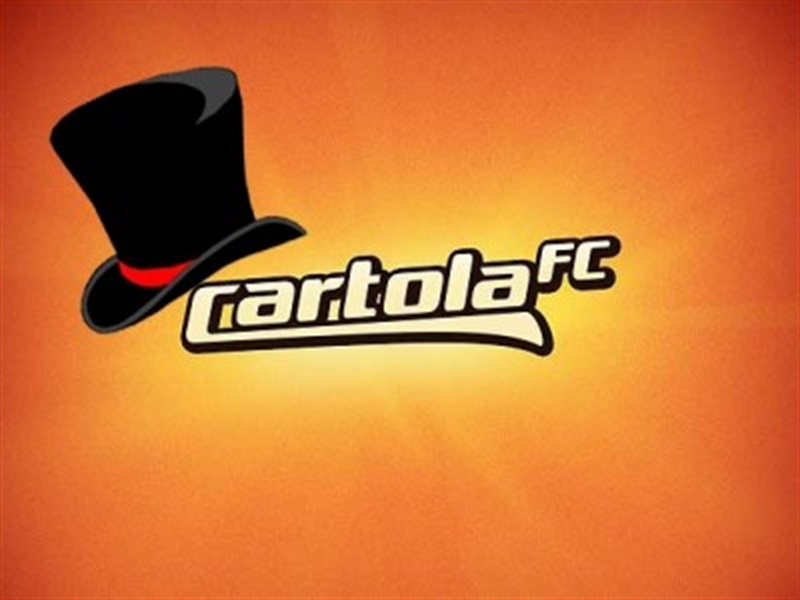

In [36]:
Image("CartolaFC.jpg", width = "300px")

**Cartola FC** é um Jogo eletrônico de futebol estilo Fantasy Games, ou seja, é um jogo fictício no qual as pessoas montam seus times com jogadores de futebol da vida real, que já conta com mais de 5 milhões de usuários cadastrados. 

### Regras e objetivos do jogo 
No início de cada temporada, cada jogador ou treinador profissional do Campeonato Brasileiro recebe um valor virtual em cartoletas (moeda corrente para transações no jogo) e, de acordo com sua performance medida em pontos no decorrer das rodadas, tem seu preço valorizado ou desvalorizado.

O usuário monta seu time inicial adquirindo onze jogadores e um treinador, dentro do limite de seu orçamento (que, inicialmente, é de **C$ 100**).

O jogo, que é baseado no Campeonato Brasileiro de Futebol, **consiste em realizar a compra e venda fictícias de jogadores, sendo que estes podem ser valorizados ou desvalorizados, conforme sua atuação em cada jogo real do campeonato**.

**O objetivo é obter mais pontos que os adversários**. A pontuação varia de acordo com os resultados obtidos pelos atletas pertencentes ao time fictício montado pelo usuário. A pontuação é somada e poucas horas após o término dos jogos da rodada é publicado o desempenho de cada um dos times. 

### Definição do Problema

Dados o histórico de dados do jogo CartolaFC, podemos dar *scores* para os jogadores, em termos de potencial de ganhos em Cartoletas?

In [45]:
cols_scouts_def = ['CA','CV','DD','DP','FC','GC','GS','RB','SG'] # alphabetical order
cols_scouts_atk = ['A','FD','FF','FS','FT','G','I','PE','PP'] # alphabetical order
cols_scouts = cols_scouts_def + cols_scouts_atk

scouts_weights = np.array([-2.0, -5.0, 3.0, 7.0, -0.5, -6.0, -2.0, 1.7, 5.0, 5.0, 1.0, 0.7, 0.5, 3.5, 8.0, -0.5, -0.3, -3.5])

def check_scouts(row):
    return np.sum(scouts_weights*row[cols_scouts])

In [9]:
%ls data/2017

2017_jogadores.csv   2017_scouts_raw.csv  2017_times.csv
2017_partidas.csv    2017_tabela.csv      README.md


## Coleta de dados


### Lendo csvs

In [59]:
j2017 = pd.read_csv('./data/2017/2017_jogadores.csv')
s2017 = pd.read_csv('./data/2017/2017_scouts_raw.csv')


In [67]:
scouts = s2017[cols_scouts_def + ["atletas.posicao_id"]]
scouts = scouts.dropna(thresh=2).dropna(1, 'all')
scouts

,CA,CV,DD,DP,FC,GC,GS,RB,SG,atletas.posicao_id
1558,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,lat
1568,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,zag
1572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,zag
1574,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,ata
1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,gol
1576,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,zag
1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,lat
1582,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,mei
1583,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,lat
1585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,gol



## Análise de dados

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


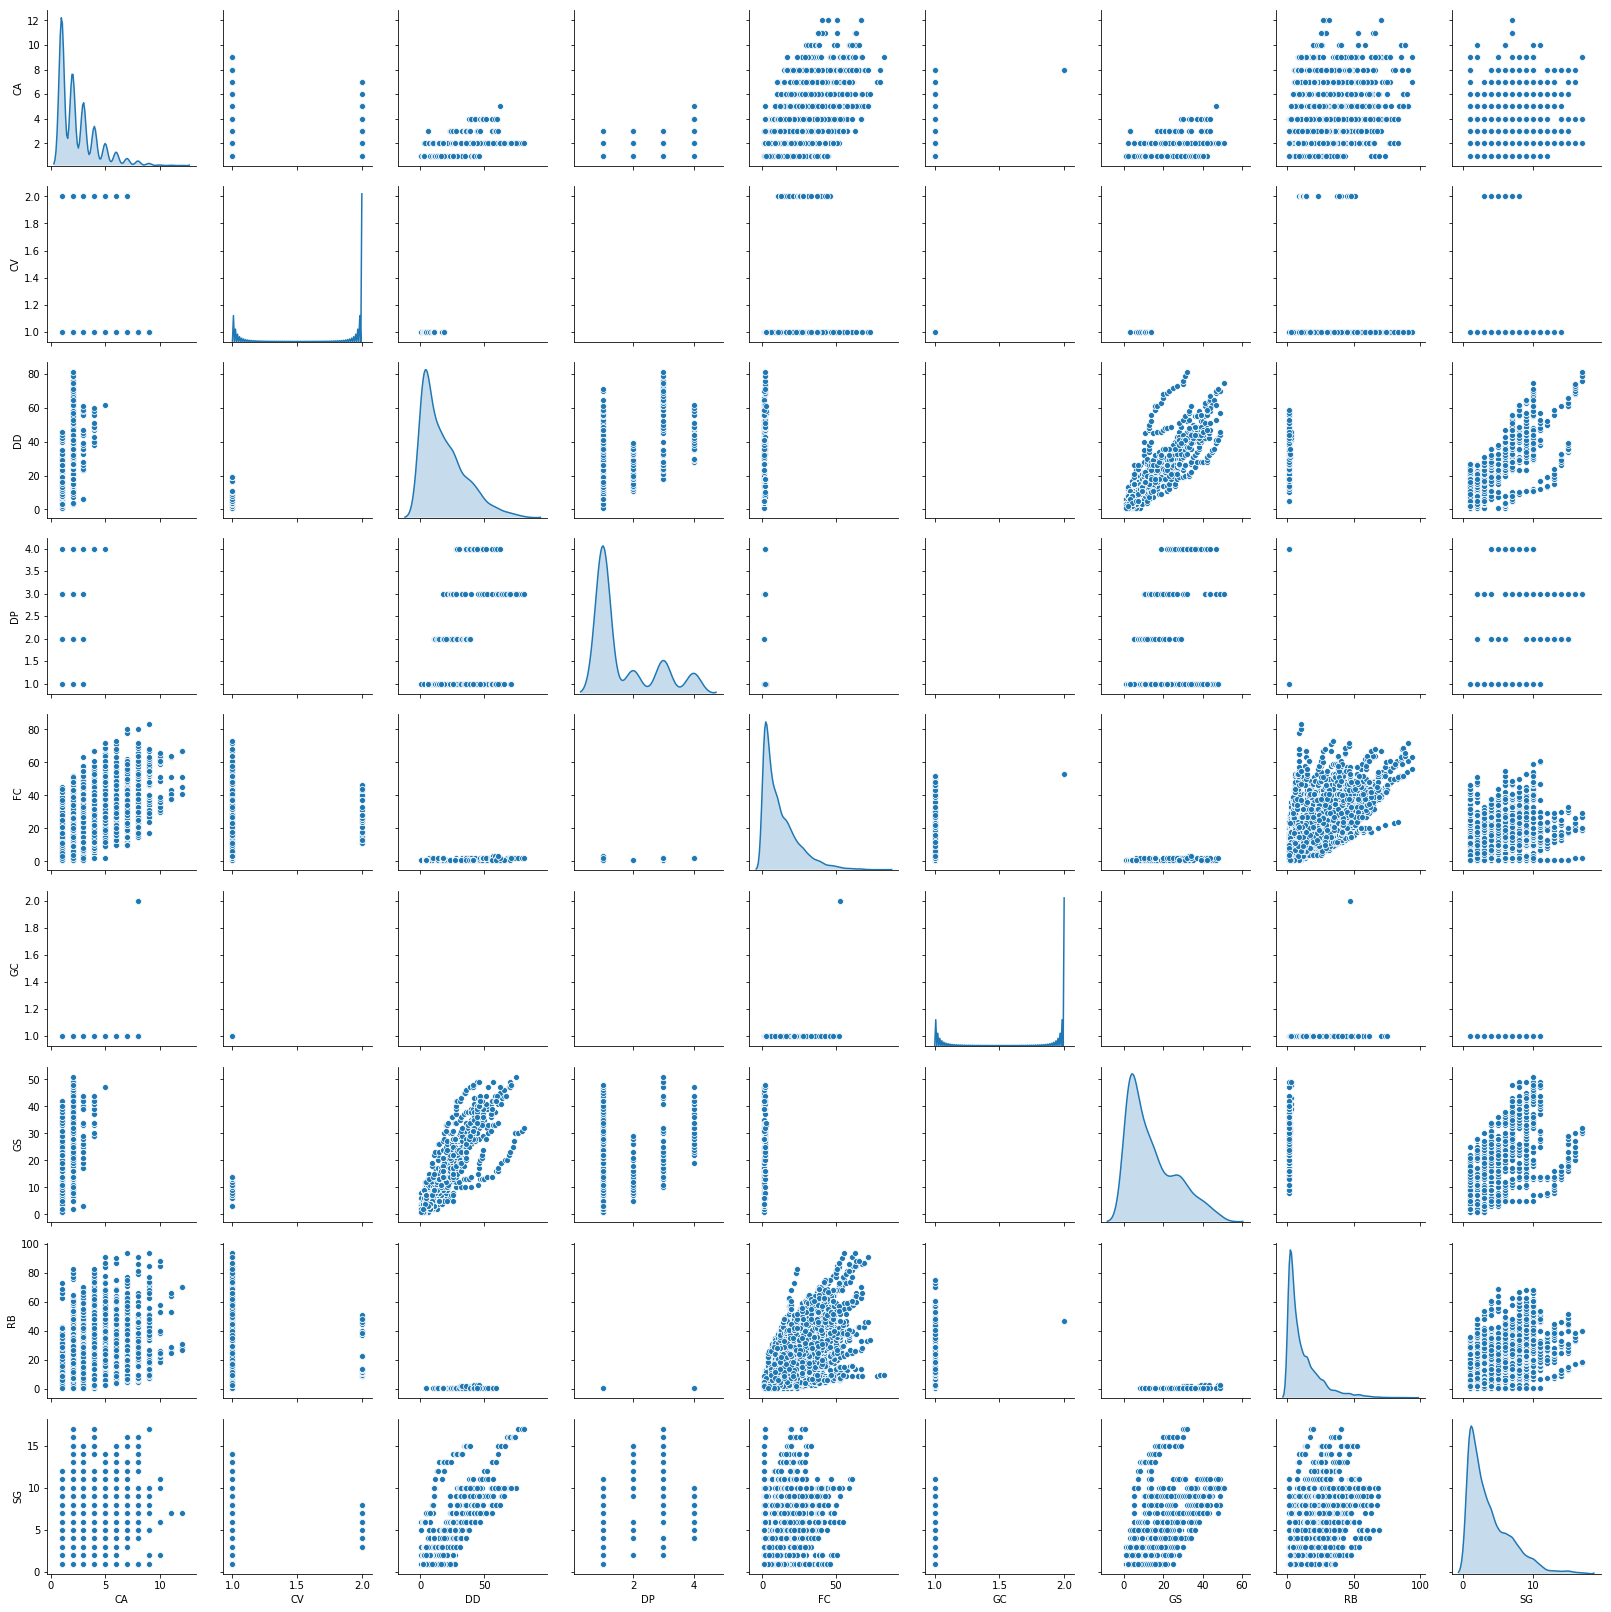

In [68]:
 #, hue="atletas.posicao_id"
sns.pairplot(
    scouts,
    #vars=labels,
    #hue='atletas.posicao_id',
    palette='Set1',
    diag_kind='kde',
)

## Estatística

## Modelagem